In [1]:
import pandas as pd
cr = pd.read_csv("E:\DATA scientist\R\Creditcard\CreditRisk.csv")

In [2]:
cr.Self_Employed = cr.Self_Employed.fillna( "Yes")
cr.Married.fillna("Yes" , inplace= True)
cr.Gender = cr.Gender.fillna("Male")
cr.Dependents = cr.Dependents.fillna(0)
cr.LoanAmount  = cr.LoanAmount.fillna(  cr.LoanAmount.mean()   )
cr.Loan_Amount_Term  =cr.Loan_Amount_Term.fillna(cr.Loan_Amount_Term.mean())
cr.Credit_History  = cr.Credit_History.fillna( 0)

In [3]:
cr.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [4]:
cr = cr.drop(["Loan_ID"] , axis = 1)

In [5]:
cr.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,142.51153,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.00000,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.00000,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.00000,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.00000,360.0,1.0,Urban,Y


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [7]:
cr[cr.select_dtypes(include = ["object"]).columns] = cr[cr.select_dtypes(include = ["object"]).columns].apply(le.fit_transform)

In [8]:
cr.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,142.51153,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.00000,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.00000,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.00000,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.00000,360.0,1.0,2,1


In [10]:
cr.x = cr.iloc[:,1:-1]
cr.y = cr.iloc[:,-1]

<ipython-input-10-262ef4363961>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  cr.x = cr.iloc[:,1:-1]
<ipython-input-10-262ef4363961>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  cr.y = cr.iloc[:,-1]


In [11]:
from sklearn.model_selection import train_test_split
cr.x_train, cr.x_test, cr.y_train, cr.y_test = train_test_split(cr.x,cr.y,test_size = 0.2)

<ipython-input-11-d29d2e127533>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  cr.x_train, cr.x_test, cr.y_train, cr.y_test = train_test_split(cr.x,cr.y,test_size = 0.2)


In [12]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()

In [13]:
LogReg.fit(cr.x_train,cr.y_train)

C:\Users\NIKIL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
pred_value  = LogReg.predict(cr.x_test )
pred_value.shape

(197,)

In [15]:
from sklearn.metrics import confusion_matrix
tab1 = confusion_matrix(pred_value, cr.y_test)
tab1

array([[ 26,  17],
       [ 31, 123]], dtype=int64)

In [16]:
tab1.diagonal().sum()*100 / tab1.sum()

75.63451776649747

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(pred_value, cr.y_test)

0.7563451776649747

In [18]:
Tpr = tab1[1,1] / (tab1[1,1] + tab1[0,1])
Tpr

0.8785714285714286

In [19]:
LogReg.intercept_

array([0.23211412])

In [20]:
pred_prob = LogReg.predict_proba(cr.x_test)
pred_prob

array([[0.16416468, 0.83583532],
       [0.09964139, 0.90035861],
       [0.10905224, 0.89094776],
       [0.12625552, 0.87374448],
       [0.09982169, 0.90017831],
       [0.72008418, 0.27991582],
       [0.11674068, 0.88325932],
       [0.31336701, 0.68663299],
       [0.24821251, 0.75178749],
       [0.1892501 , 0.8107499 ],
       [0.12653519, 0.87346481],
       [0.23314124, 0.76685876],
       [0.81211737, 0.18788263],
       [0.12843574, 0.87156426],
       [0.13474753, 0.86525247],
       [0.50933836, 0.49066164],
       [0.18379691, 0.81620309],
       [0.10727898, 0.89272102],
       [0.06586562, 0.93413438],
       [0.17597338, 0.82402662],
       [0.18188233, 0.81811767],
       [0.18108697, 0.81891303],
       [0.08343651, 0.91656349],
       [0.15279519, 0.84720481],
       [0.14513341, 0.85486659],
       [0.13867848, 0.86132152],
       [0.18687768, 0.81312232],
       [0.36675705, 0.63324295],
       [0.20545837, 0.79454163],
       [0.15829642, 0.84170358],
       [0.

In [21]:
from sklearn.metrics import roc_auc_score
log_roc_score = roc_auc_score(cr.y_test, pred_value)
log_roc_score

0.6673558897243108

In [22]:
pred_value_prob = pd.DataFrame(pred_prob)

In [23]:
pred_value_prob = pred_value_prob.iloc[:,1]


In [24]:
from sklearn.metrics import roc_curve
fpr,tpr, Threshold = roc_curve(cr.y_test,pred_value_prob)

Text(0.5, 0.5, 'AUROC IS 0.7128')

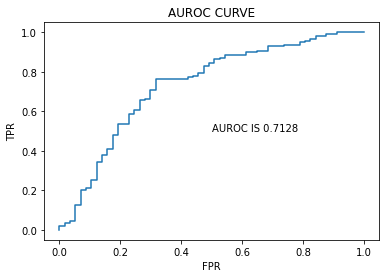

In [25]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUROC CURVE")
plt.text(x= 0.5, y = 0.5, s= "AUROC IS 0.7128")

In [26]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(min_samples_split=50)
dt.fit(cr.x_train,cr.y_train)

DecisionTreeClassifier(min_samples_split=50)

In [27]:
dt_pred_test =dt.predict(cr.x_test)
tab2 = confusion_matrix(dt_pred_test,cr.y_test)
tab2

array([[ 30,  25],
       [ 27, 115]], dtype=int64)

In [28]:
dt_accuracy = tab2.diagonal().sum() * 100 / tab2.sum()
dt_accuracy

73.60406091370558

In [29]:
dt.feature_importances_

array([0.00532312, 0.00806224, 0.        , 0.        , 0.16463114,
       0.07478723, 0.0728337 , 0.038295  , 0.61563467, 0.02043289])

In [30]:
imp_features = pd.DataFrame({"Features" : cr.x_test.columns,"Importance": dt.feature_importances_})
imp_features.sort_values("Importance", ascending = False )

,Features,Importance
8,Credit_History,0.615635
4,ApplicantIncome,0.164631
5,CoapplicantIncome,0.074787
6,LoanAmount,0.072834
7,Loan_Amount_Term,0.038295
9,Property_Area,0.020433
1,Dependents,0.008062
0,Married,0.005323
2,Education,0.000000
3,Self_Employed,0.000000


In [31]:
# Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier(n_estimators= 500)

In [33]:
rfc.fit(cr.x_train,cr.y_train)
pred_rfc = rfc.predict(cr.x_test)

In [34]:
tab_rf = confusion_matrix(pred_rfc,cr.y_test)
tab_rf

array([[ 25,  17],
       [ 32, 123]], dtype=int64)

In [35]:
accuracy_rf = tab_rf.diagonal().sum() * 100 / tab_rf.sum()
accuracy_rf

75.1269035532995

In [36]:
imp_features_RF = pd.DataFrame({"Features" : cr.x_test.columns,"Importance": rfc.feature_importances_})
imp_features_RF.sort_values("Importance", ascending = False )

,Features,Importance
8,Credit_History,0.268043
4,ApplicantIncome,0.213679
6,LoanAmount,0.194720
5,CoapplicantIncome,0.115537
7,Loan_Amount_Term,0.046959
1,Dependents,0.045530
9,Property_Area,0.043745
0,Married,0.028591
2,Education,0.022811
3,Self_Employed,0.020385


In [37]:
# Adaptive Boosting 

In [38]:
from sklearn.ensemble import AdaBoostClassifier
dt = DecisionTreeClassifier()
abc = AdaBoostClassifier(dt,10)

C:\Users\NIKIL\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_estimators=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [39]:
abc.fit(cr.x_train,cr.y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10)

In [40]:
pred_adaboost = abc.predict(cr.x_test)
tab_adaboost = confusion_matrix(pred_adaboost,cr.y_test)
tab_adaboost

array([[ 33,  27],
       [ 24, 113]], dtype=int64)

In [41]:
accuracy_adaboost = accuracy_score(pred_adaboost,cr.y_test)
accuracy_adaboost

0.7411167512690355

In [42]:
# Naive Bayes 


In [43]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [44]:
nb.fit(cr.x_train,cr.y_train)

MultinomialNB()

In [46]:
pred_nb = nb.predict(cr.x_test)
tab_nb = confusion_matrix(pred_nb,cr.y_test)
tab_nb

array([[21, 75],
       [36, 65]], dtype=int64)

In [48]:
acc_nb = tab_nb.diagonal().sum()* 100 / tab_nb.sum()
acc_nb

43.65482233502538